Epoch 1/10
782/782 [==============================] - 11s 13ms/step - loss: 1.5898 - accuracy: 0.4205 - val_loss: 1.3112 - val_accuracy: 0.5320
Epoch 2/10
782/782 [==============================] - 10s 13ms/step - loss: 1.2205 - accuracy: 0.5643 - val_loss: 1.1393 - val_accuracy: 0.5990
Epoch 3/10
782/782 [==============================] - 9s 12ms/step - loss: 1.0600 - accuracy: 0.6268 - val_loss: 1.0235 - val_accuracy: 0.6361
Epoch 4/10
782/782 [==============================] - 9s 12ms/step - loss: 0.9592 - accuracy: 0.6652 - val_loss: 0.9470 - val_accuracy: 0.6674
Epoch 5/10
782/782 [==============================] - 9s 11ms/step - loss: 0.8726 - accuracy: 0.6982 - val_loss: 0.9103 - val_accuracy: 0.6762
Epoch 6/10
782/782 [==============================] - 10s 12ms/step - loss: 0.8136 - accuracy: 0.7148 - val_loss: 0.9092 - val_accuracy: 0.6756
Epoch 7/10
782/782 [==============================] - 10s 12ms/step - loss: 0.7608 - accuracy: 0.7339 - val_loss: 0.8702 - val_accuracy: 0.

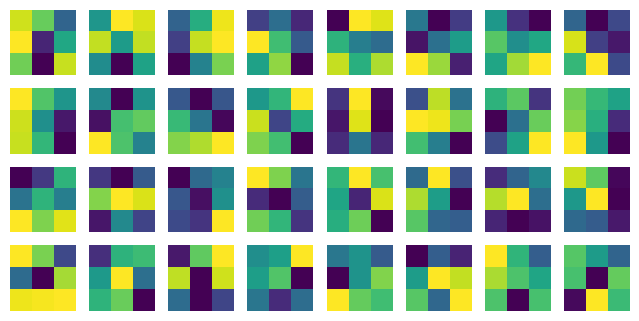

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the CNN on the CIFAR-10 dataset
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

# Find the name of the first convolutional layer
conv_layer_names = [layer.name for layer in model.layers if isinstance(layer, Conv2D)]
if len(conv_layer_names) > 0:
    first_conv_layer_name = conv_layer_names[0]

# Extract the filters from the first convolutional layer
filters, biases = model.get_layer(first_conv_layer_name).get_weights()

# Normalize the filters for visualization
filters_min, filters_max = filters.min(), filters.max()
filters = (filters - filters_min) / (filters_max - filters_min)

# Plot the filters
plt.figure(figsize=(8, 8))
for i in range(filters.shape[3]):
    plt.subplot(8, 8, i + 1)
    plt.imshow(filters[:, :, 0, i], cmap='viridis')
    plt.axis('off')

plt.show()
